In [1]:
!pip install kaggle 

In [2]:
import kaggle
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

import os

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [4]:
api = KaggleApi()
api.authenticate()

In [5]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
working_directory = 'C:\\Users\\joshu\\Documents\\git\\titanic_basicmachinelearning'

for dirname, _, filenames in os.walk(working_directory): 
    for filename in filenames:
        if ".zip" in os.path.join(dirname, filename):
            path_to_zip_file = os.path.join(dirname, filename)
        #print(os.path.join(dirname, filename)) 
print(path_to_zip_file)

C:\Users\joshu\Documents\git\titanic_basicmachinelearning\titanic.zip


In [7]:
!mkdir files

A subdirectory or file files already exists.


In [8]:
import zipfile

files_path = working_directory + '\\files'

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(files_path)
    
for dirname, _, filenames in os.walk(files_path): 
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

C:\Users\joshu\Documents\git\titanic_basicmachinelearning\files\gender_submission.csv
C:\Users\joshu\Documents\git\titanic_basicmachinelearning\files\test.csv
C:\Users\joshu\Documents\git\titanic_basicmachinelearning\files\train.csv


In [9]:
train_data = pd.read_csv(files_path + '\\train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_data = pd.read_csv(files_path + '\\test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [12]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [13]:
#from sklearn.ensemble import RandomForestClassifier

'''

Kaggle's code

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
'''

'\n\nKaggle\'s code\n\ny = train_data["Survived"]\n\nfeatures = ["Pclass", "Sex", "SibSp", "Parch"]\nX = pd.get_dummies(train_data[features])\nX_test = pd.get_dummies(test_data[features])\n\nmodel = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)\nmodel.fit(X, y)\npredictions = model.predict(X_test)\n\noutput = pd.DataFrame({\'PassengerId\': test_data.PassengerId, \'Survived\': predictions})\noutput.to_csv(\'my_submission.csv\', index=False)\nprint("Your submission was successfully saved!")\n'

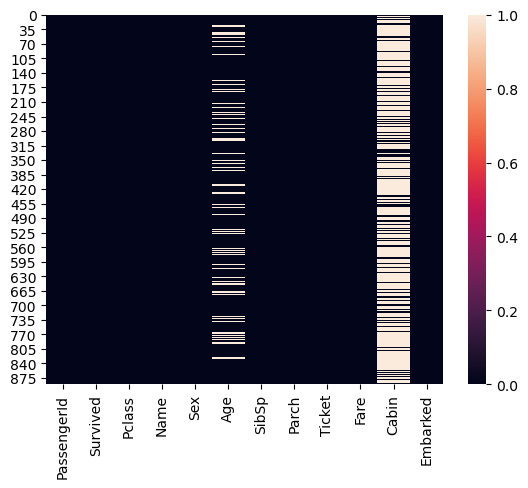

In [14]:
#plt.figure(figsize=(10, 5))
sns.heatmap(train_data.isna())
plt.show()

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


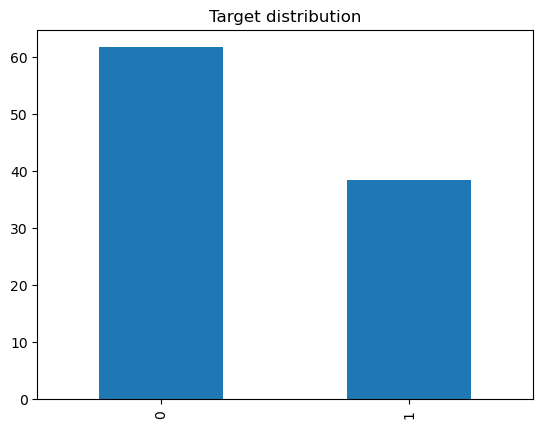

In [17]:
(train_data.Survived.value_counts() / train_data.shape[0] * 100).plot.bar(title='Target distribution')
plt.show()

# Quantitative variables :

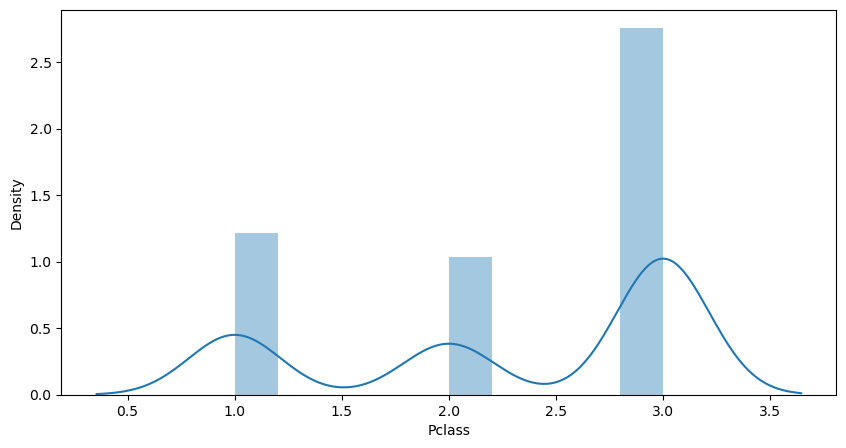

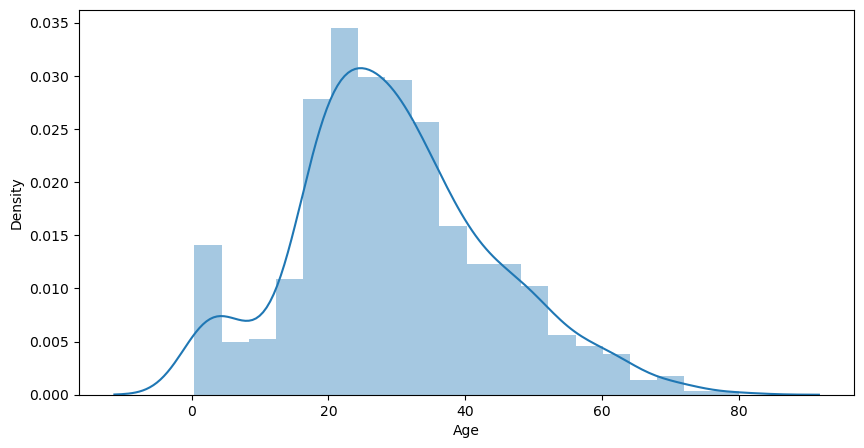

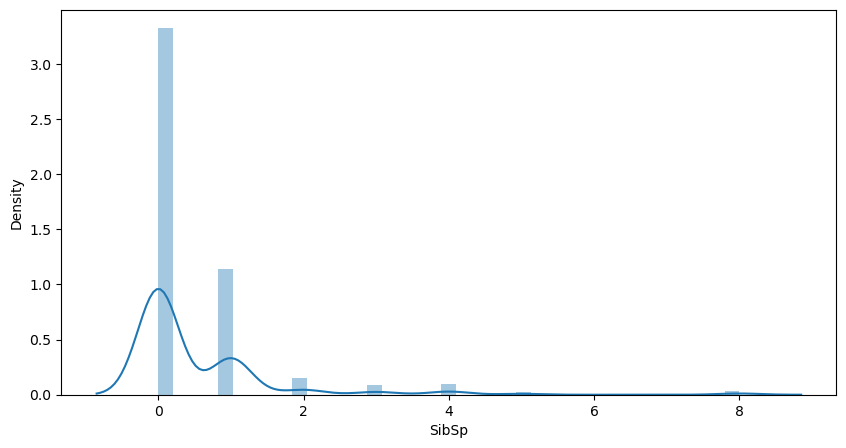

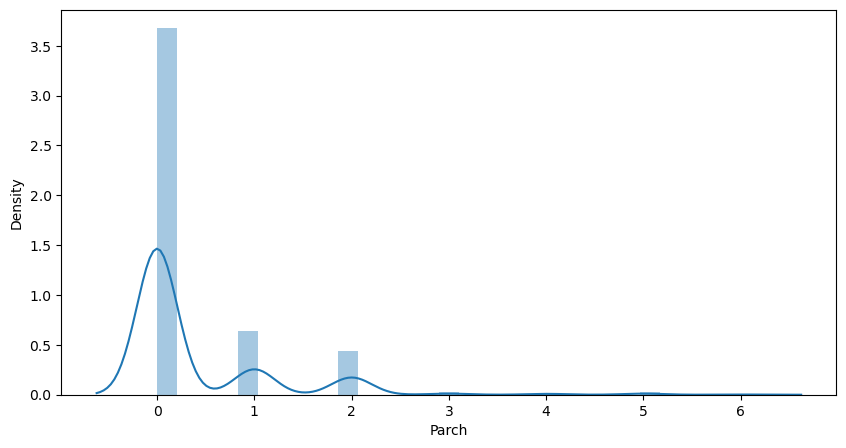

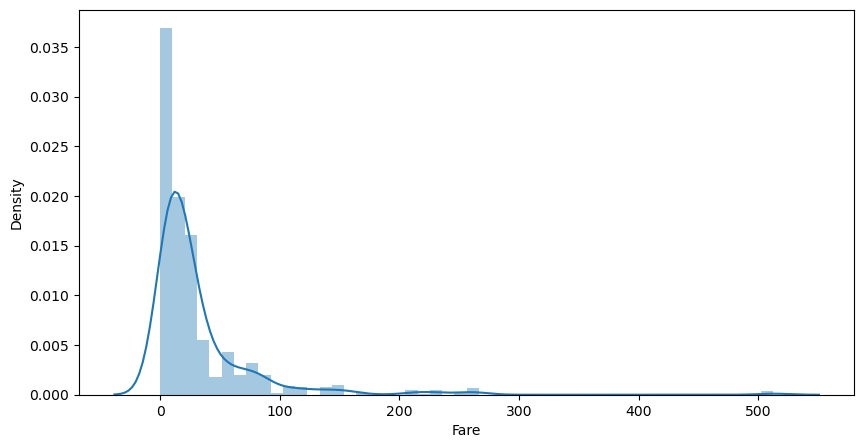

In [18]:
quantitative_col = [ 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']

for col in quantitative_col :
    plt.figure(figsize=(10, 5))
    sns.distplot(train_data[col])
    plt.show()

# Inference 
#### The target is not perfectly distributed on Survived and unSurvived peaple, so using F-score as a metric is a good option
#### Pclass, SibSp and Parch can be encoded as they contain just some diffirent values
#### Age and Fare may be normalized

# Qualitative variables :

In [19]:
train_data.select_dtypes('object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [20]:
qualitative_col = ['Sex', 'Ticket', 'Cabin', 'Embarked']

for col in qualitative_col :
    print(f'{col :-<50} {train_data[col].unique()}')

Sex----------------------------------------------- ['male' 'female']
Ticket-------------------------------------------- ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '3

# Relationship between target and variables :

In [21]:
train_data.drop('PassengerId', axis = 1, inplace = True)

In [22]:
# color palette from seaborn
cm = sns.light_palette("green", as_cmap=True)
 
# Visualizing the DataFrame with set precision
train_data.corr().style.background_gradient(cmap=cm).set_precision(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.26,-0.55,0.10,0.16,0.22,1.00


In [23]:
survived_people = train_data[train_data.Survived == 1]
unsurvived_people = train_data[train_data.Survived == 0]

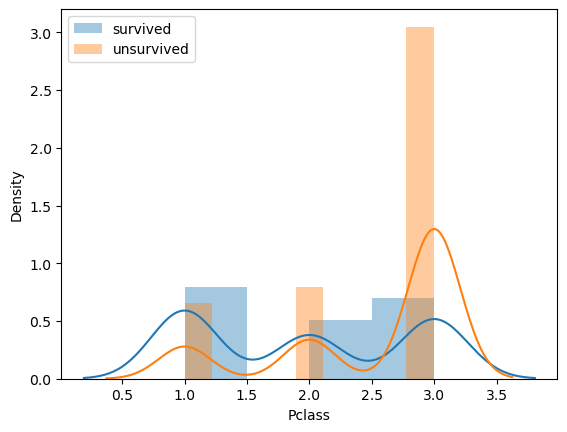

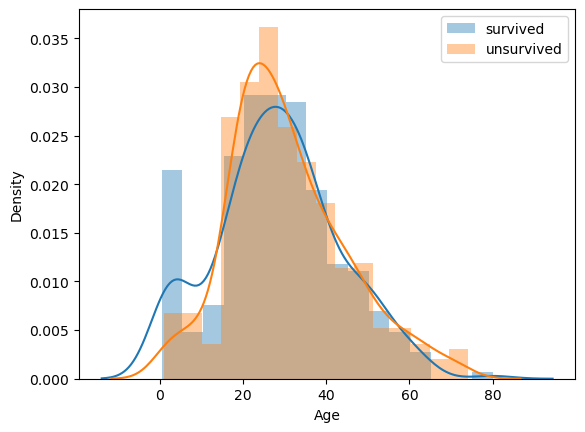

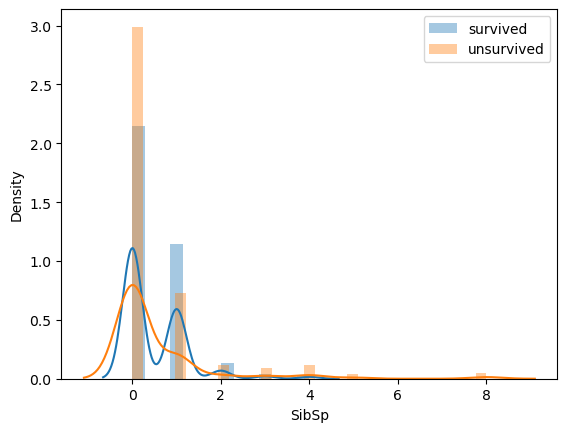

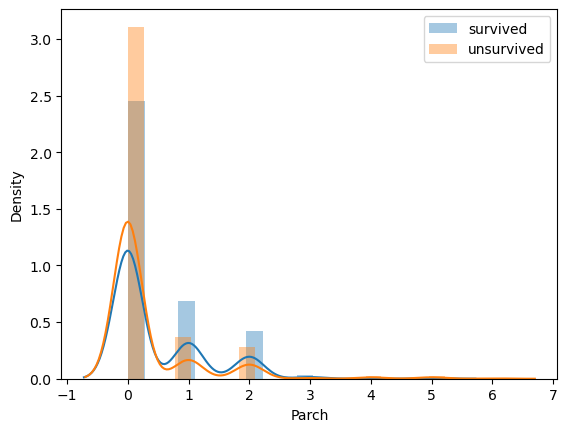

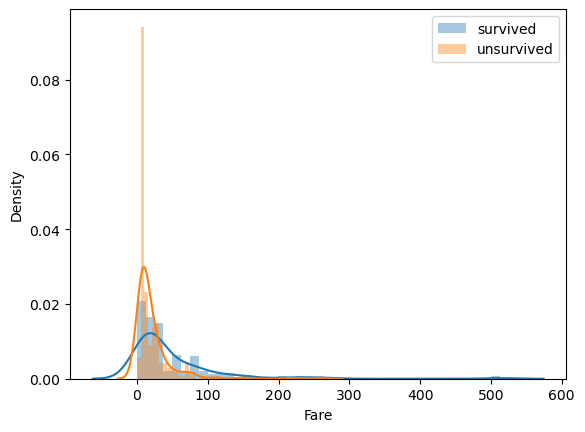

In [24]:
for col in quantitative_col :
    plt.figure()
    sns.distplot(survived_people[col], label='survived')
    sns.distplot(unsurvived_people[col], label='unsurvived')
    plt.legend()
    plt.show()

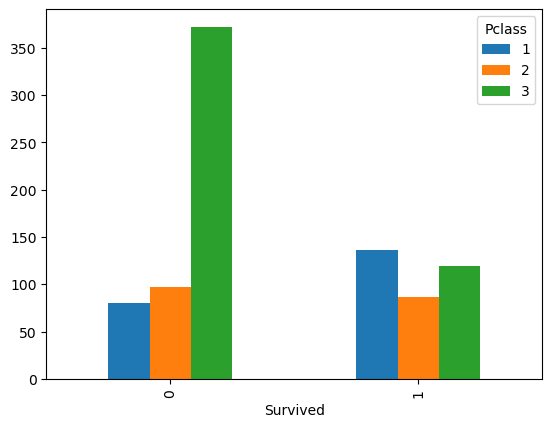

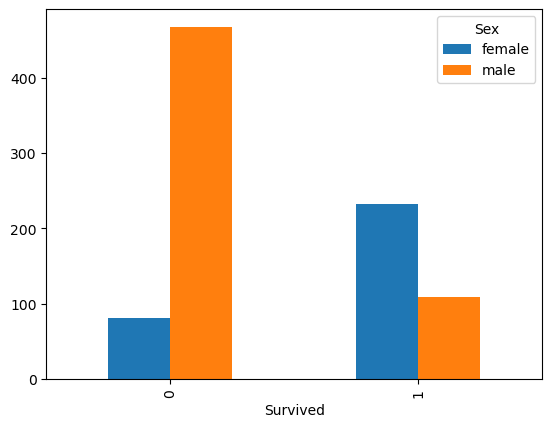

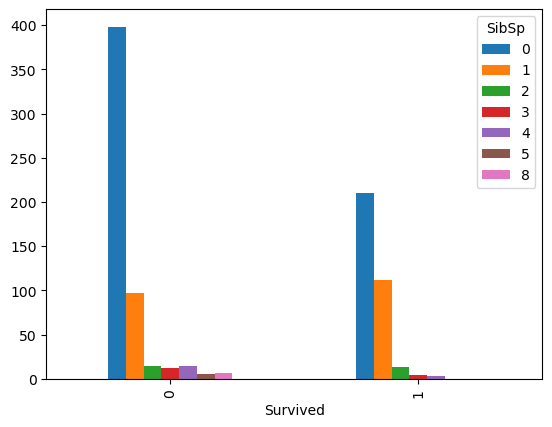

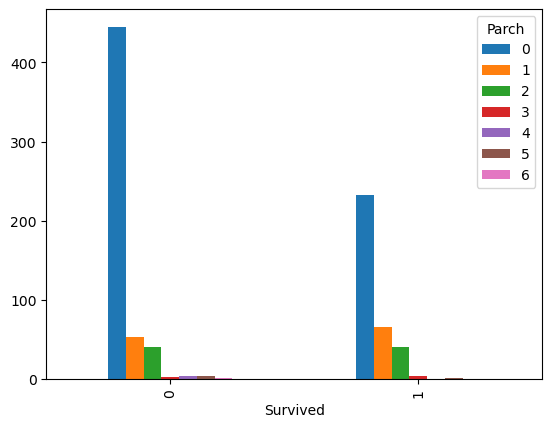

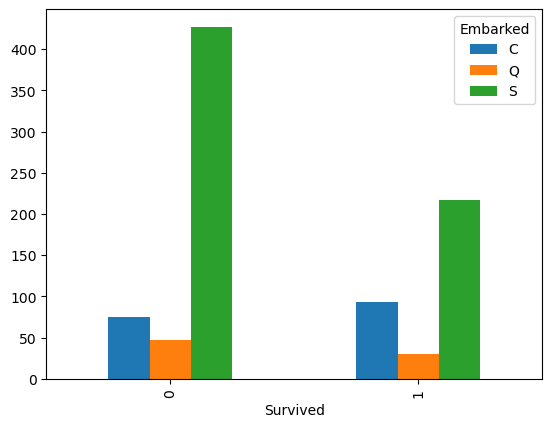

In [25]:
for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'] :
    pd.crosstab(train_data['Survived'], train_data[col]).plot.bar()
    plt.show()

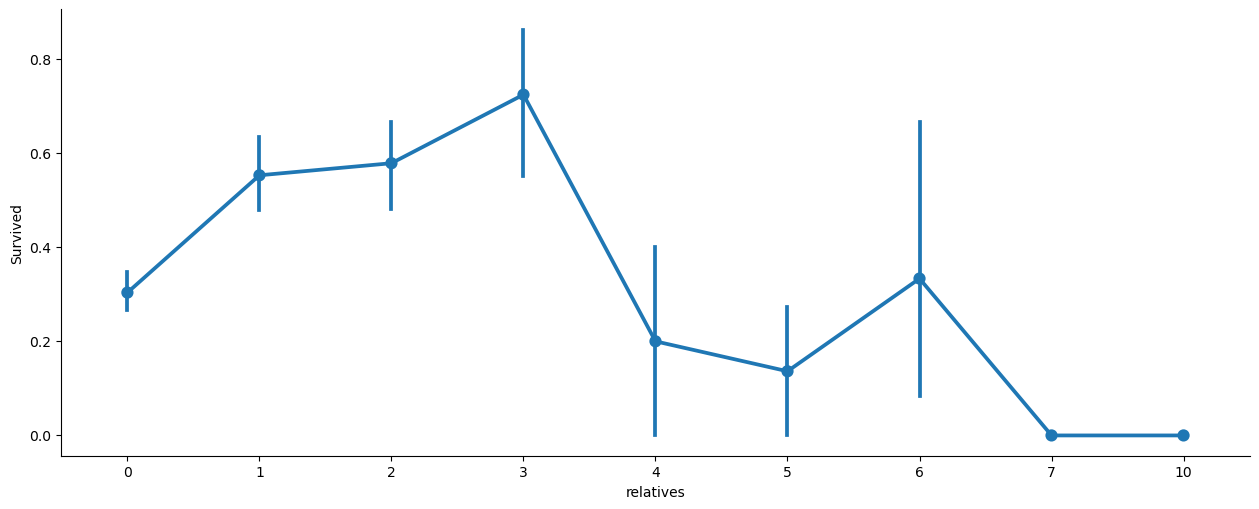

In [26]:
data = [train_data, test_data]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'

axes = sns.factorplot('relatives','Survived', 
                      data=train_data, aspect = 2.5, )

plt.show()

# Inferences 
1. Pclass and Fare are highly correlated with our target and between each other, also SibSp and Parch have significant correlation with it and also between each other
1. The younger you are the more likely to survive
1. More people in class 3 died
1. females have more chance to survive
1. Alone People have more chance to die and if you travel with 1 to 3 people you have more chance to survive
1. People who travel from C have more chance to not survive

# Pre-processing:

In [27]:
# concatenate train and test set for an easy pre-processing
df = train_data.append(test_data).reset_index(drop=True)

# Feature engineering

In [28]:
for i in range(len(df)):
    if not(pd.isnull(df['Cabin'].iloc[i])):
        df['Cabin'].iloc[i]=df['Cabin'].iloc[i][0] 
    else :
        df['Cabin'].iloc[i]='No'

In [29]:
# add familly size column
df['Fsize'] = df['Parch'] + df['SibSp'] + 1

In [30]:
df['travelled_alone'] = 'No'
df.loc[df.Fsize == 1, 'travelled_alone'] = 'Yes'

In [31]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Rev', 'Don', 'Countess', 'Jonkheer', 'Dona', 'Sir', 'Dr', 'Major', 'Dr'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Mme', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Lady'], 'Mrs')

# Imputation :

In [32]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

mean = df["Age"].mean()
std = df["Age"].std()
is_null = df["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["Age"] = age_slice
df["Age"] = df["Age"].astype(int)

In [33]:
df['Fare'].fillna(df['Fare'].mean(), inplace = True)

# Encoding

In [34]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'relatives', 'travelled_alone',
       'PassengerId', 'Fsize', 'Title'],
      dtype='object')

In [35]:
features = ["Sex", "Pclass","travelled_alone", "Cabin", "Embarked", "Title"]

In [36]:
df=pd.get_dummies(df,columns=features,drop_first=True)

In [37]:
df.head(2)

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,relatives,PassengerId,Fsize,...,Cabin_F,Cabin_G,Cabin_No,Cabin_T,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.0,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,1,NaN,2,...,0,0,1,0,0,1,0,1,0,0
1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,1,NaN,2,...,0,0,0,0,0,0,0,0,1,0


In [38]:
df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [39]:
train = df[:len(train_data)]
test = df[len(train_data):]

In [40]:
train.isna().sum() / train.shape[0] * 100

Survived                 0.0
Age                      0.0
SibSp                    0.0
Parch                    0.0
Fare                     0.0
relatives                0.0
PassengerId            100.0
Fsize                    0.0
Sex_male                 0.0
Pclass_2                 0.0
Pclass_3                 0.0
travelled_alone_Yes      0.0
Cabin_B                  0.0
Cabin_C                  0.0
Cabin_D                  0.0
Cabin_E                  0.0
Cabin_F                  0.0
Cabin_G                  0.0
Cabin_No                 0.0
Cabin_T                  0.0
Embarked_Q               0.0
Embarked_S               0.0
Title_Miss               0.0
Title_Mr                 0.0
Title_Mrs                0.0
Title_Rare               0.0
dtype: float64

In [41]:
test.isna().sum() / test.shape[0] * 100

Survived               100.0
Age                      0.0
SibSp                    0.0
Parch                    0.0
Fare                     0.0
relatives                0.0
PassengerId              0.0
Fsize                    0.0
Sex_male                 0.0
Pclass_2                 0.0
Pclass_3                 0.0
travelled_alone_Yes      0.0
Cabin_B                  0.0
Cabin_C                  0.0
Cabin_D                  0.0
Cabin_E                  0.0
Cabin_F                  0.0
Cabin_G                  0.0
Cabin_No                 0.0
Cabin_T                  0.0
Embarked_Q               0.0
Embarked_S               0.0
Title_Miss               0.0
Title_Mr                 0.0
Title_Mrs                0.0
Title_Rare               0.0
dtype: float64

## Train Test split  

In [42]:
X = train.drop(['Survived','PassengerId'], axis = 1)
y = train.Survived
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Modeling and Evaluation

In [43]:
def evaluation(model):
    
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [44]:
model = RandomForestClassifier(random_state=0)

[[101   9]
 [ 20  49]]
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       110
         1.0       0.84      0.71      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



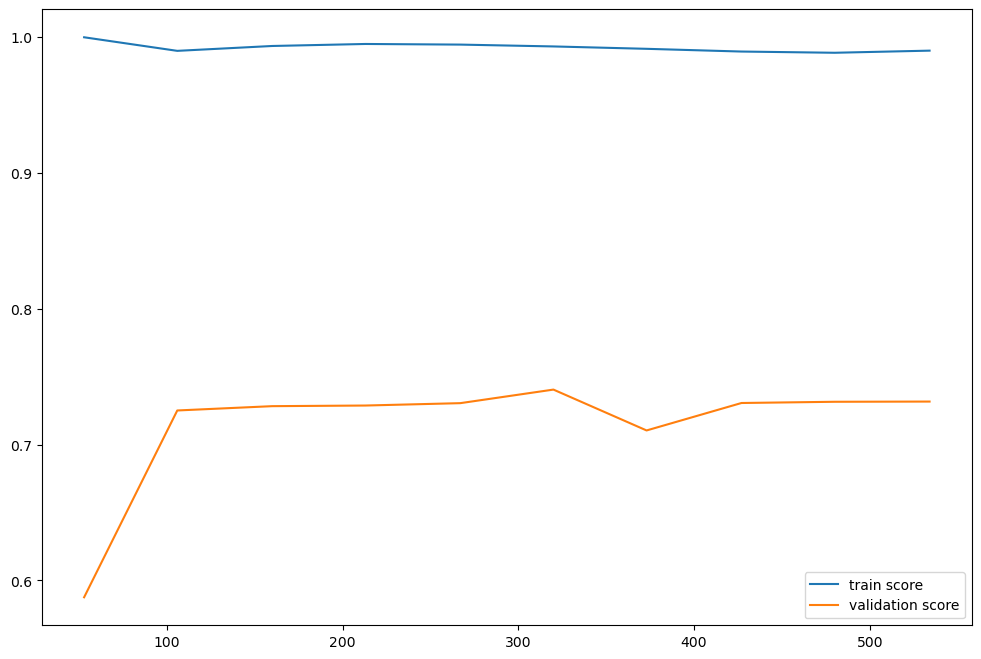

In [45]:
evaluation(model)
plt.show()

In [46]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [47]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [48]:
dict_of_models = {'RandomForest': RandomForest,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest
[[84 26]
 [14 55]]
              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81       110
         1.0       0.68      0.80      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



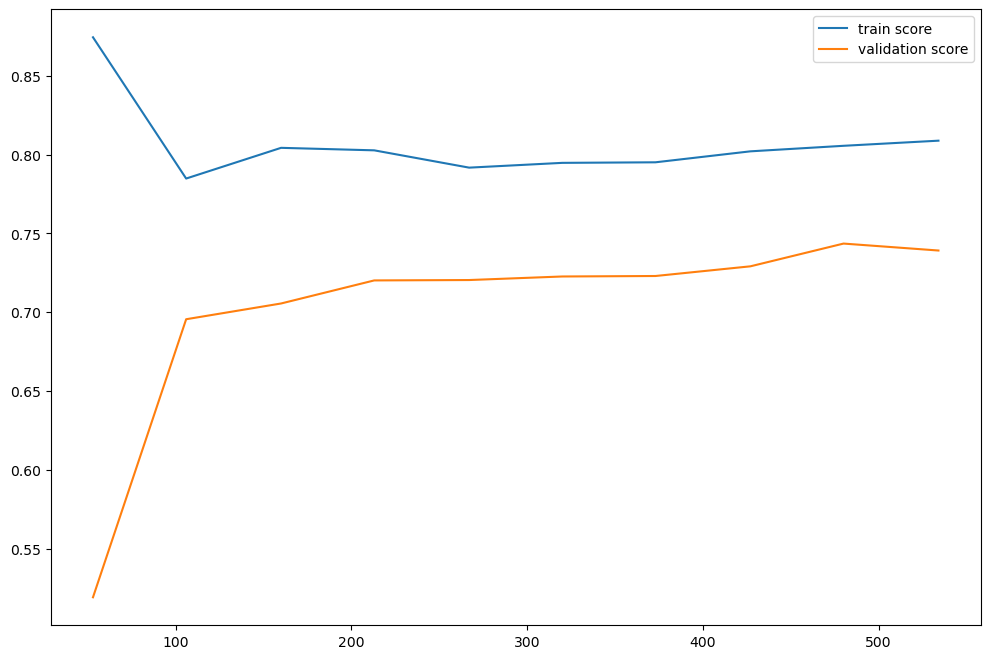

SVM
[[92 18]
 [18 51]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       110
         1.0       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



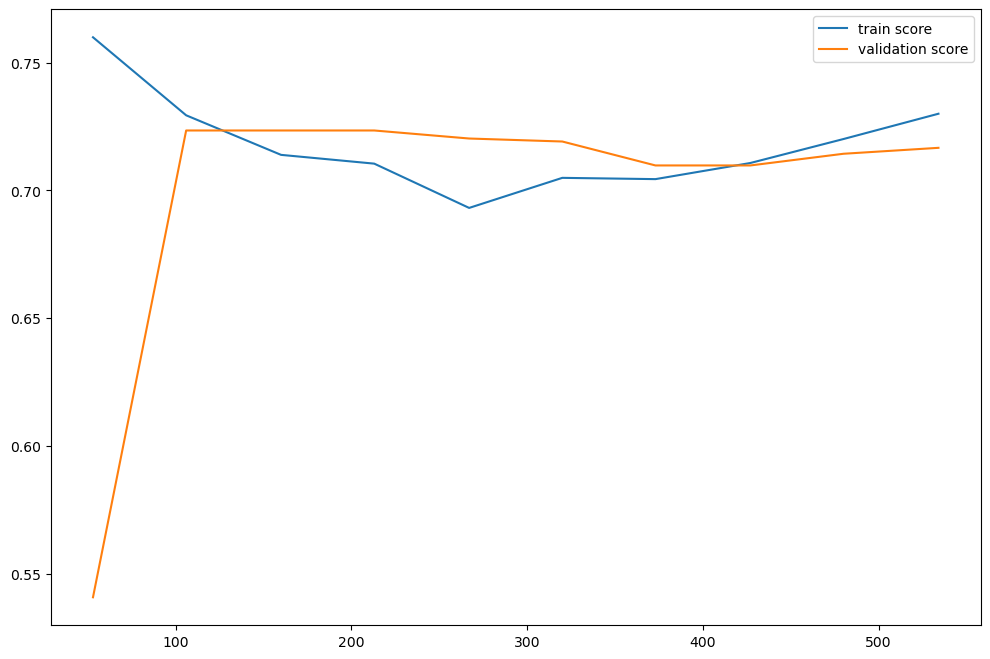

KNN
[[89 21]
 [16 53]]
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       110
         1.0       0.72      0.77      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



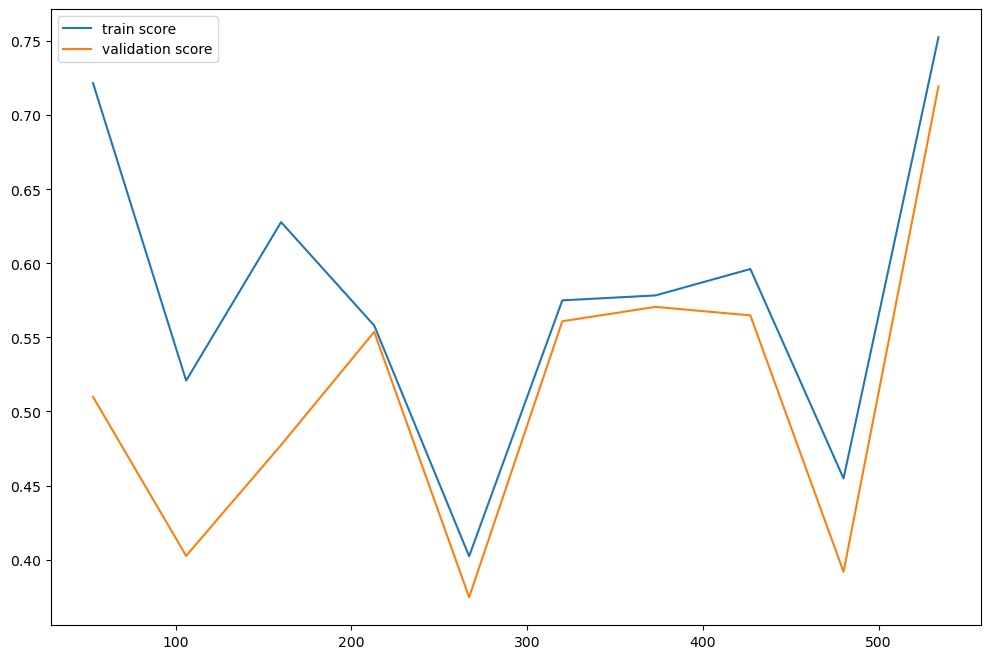

In [49]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)
    plt.show()



In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [51]:
RandomForest

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

In [52]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(30, 50),
                'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_features': max_features,
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__min_samples_split': min_samples_split,
               'randomforestclassifier__min_samples_leaf': min_samples_leaf,
               'randomforestclassifier__bootstrap': bootstrap}

In [53]:
grid = RandomizedSearchCV(RandomForest, random_grid, scoring='recall', cv=4,
                          n_iter=50)

grid.fit(x_train, y_train)
print(grid.best_params_)

{'randomforestclassifier__n_estimators': 1000, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__max_depth': 40, 'randomforestclassifier__bootstrap': False, 'pipeline__selectkbest__k': 48, 'pipeline__polynomialfeatures__degree': 3}


[[84 26]
 [14 55]]
              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81       110
         1.0       0.68      0.80      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



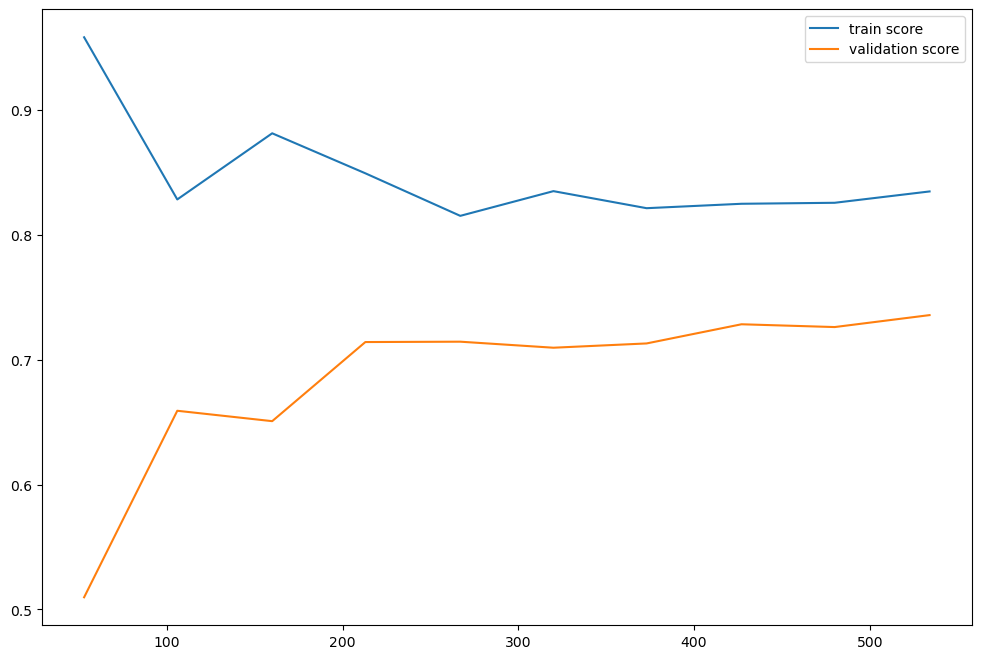

In [54]:
evaluation(grid.best_estimator_)
plt.show()

In [55]:
submit = pd.read_csv(files_path + '\\gender_submission.csv')

In [56]:
test.head(2)

,Survived,Age,SibSp,Parch,Fare,relatives,PassengerId,Fsize,Sex_male,Pclass_2,...,Cabin_F,Cabin_G,Cabin_No,Cabin_T,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
891,NaN,34,0,0,7.8292,0,892.0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
892,NaN,47,1,0,7.0000,1,893.0,2,0,0,...,0,0,1,0,0,1,0,0,1,0


In [57]:
test.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'relatives', 'PassengerId',
       'Fsize', 'Sex_male', 'Pclass_2', 'Pclass_3', 'travelled_alone_Yes',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_No', 'Cabin_T', 'Embarked_Q', 'Embarked_S', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

In [58]:
#test.isna().sum()
#grid.predict(test.drop(['Survived', 'PassengerId'], axis = 1))

submit['Survived']=grid.predict(test.drop(['Survived', 'PassengerId'], axis = 1)).astype('int')
submit.to_csv('submission.csv',index=False)

In [59]:
submit.head(2)

,PassengerId,Survived
0,892,0
1,893,1
